In [1]:
import xarray as xr 
import numpy as np 
import pandas as pd 
import glob 
import os

import matplotlib.pyplot as plt

import matplotlib as mpl
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib import ticker

#plotting with Cartopy. 
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import cm
from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# rc('font',**{'family':'serif','serif':['Times']})
# rc('text', usetex=True)
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [21]:
all_levs = np.array([87.82123029, 103.31712663, 121.54724076,
       142.99403876, 168.22507977, 197.9080867 , 232.82861896,
       273.91081676, 322.24190235, 379.10090387, 445.9925741 ,
       524.68717471, 609.77869481, 691.38943031, 763.40448111,
       820.85836865, 859.53476653, 887.02024892, 912.64454694,
       936.19839847, 957.48547954, 976.32540739, 992.55609512])
Fns = []
for al in all_levs:
    ff = sorted(glob.glob(f'/glade/campaign/cgd/amp/wchapman/DA_ML/CESML_AI/Data/LINREG_weights/VALMETRICS_roll2*_Nudge_UV_2000_*{str(al)[:6]}*128*.nc'))
    Fns.append(ff)
    
    
r2_u =np.zeros([len(Fns),192])
r2_v =np.zeros([len(Fns),192])
r2_t =np.zeros([len(Fns),192])
r2_vert = np.zeros([len(Fns),2])

for ee,fl in enumerate(Fns):
    weights = np.cos(np.deg2rad(DS.lat))
    DS = xr.open_dataset(fl[0])
    r2_u[ee,:]= np.array(DS.mean('lon').isel(var=0)['r2_']) 
    r2_v[ee,:]= np.array(DS.mean('lon').isel(var=1)['r2_']) 
    r2_t[ee,:]= np.array(DS.mean('lon').isel(var=2)['r2_']) 
    r2_vert[ee, 0] = DS['r2_'].weighted(weights).mean(("lat","lon"))[0].values
    r2_vert[ee, 1] = DS['r2_'].weighted(weights).mean(("lat","lon"))[1].values

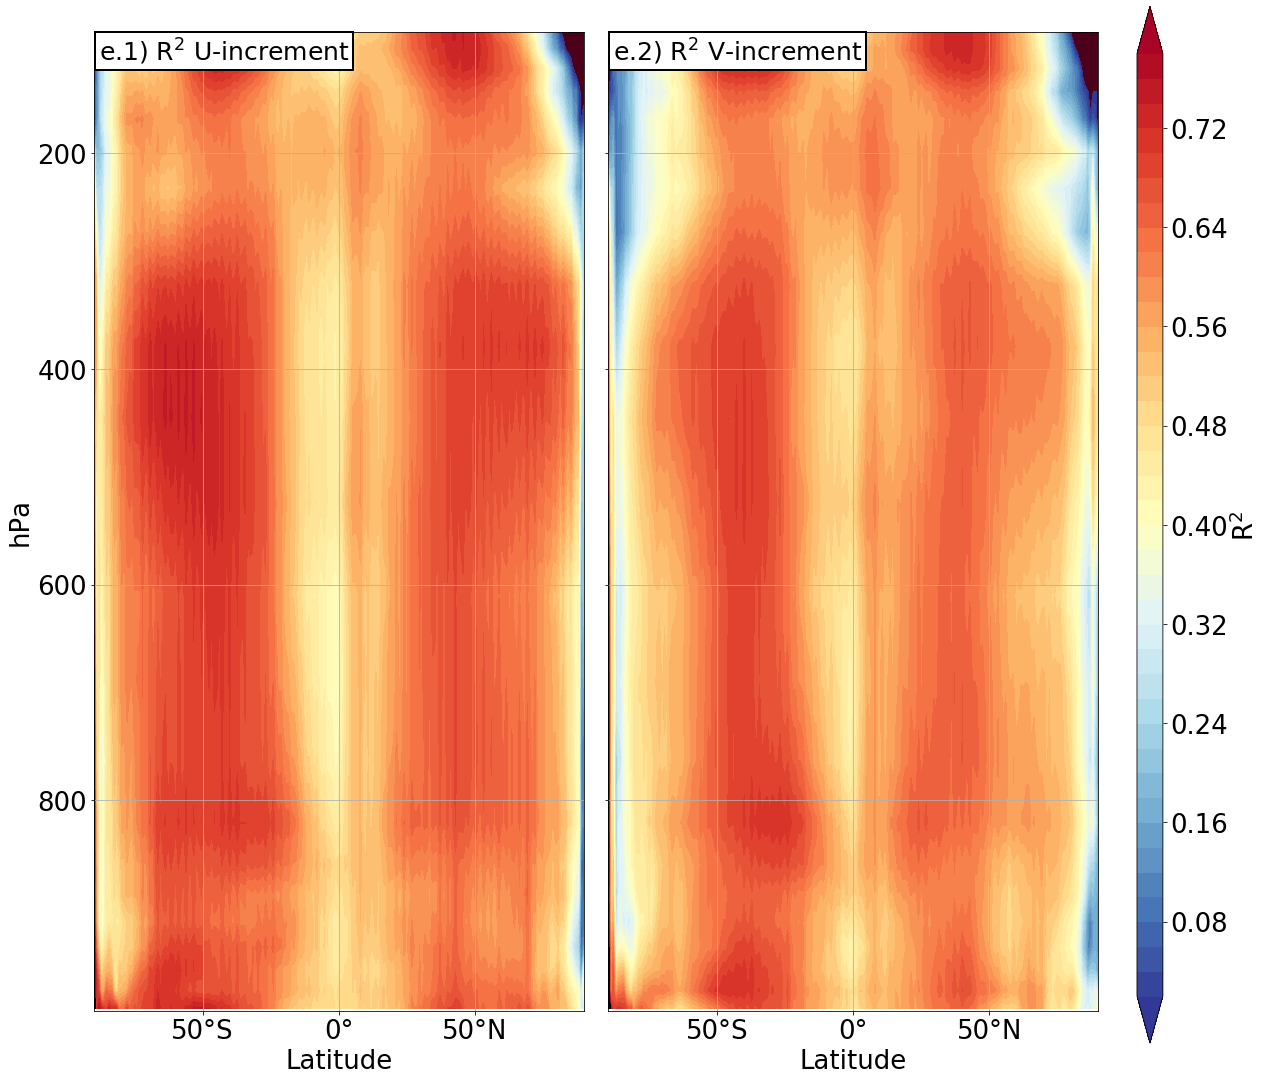

In [3]:
cmap = plt.cm.RdYlBu_r
# extract all colors from the Reds map
cmaplist = [cmap(i) for i in range(cmap.N)]
# make the first color entry to be whhite
cmaplist[0] = cmap(1)
# make the last color entry to be most extreme--
cmaplist[cmap.N-1] = cmap(0.99)
# cmaplist[ii]=[1,1,1,1]

cmap.N
# create the new map
cmap = cmap.from_list('My cmap', cmaplist, cmap.N)
clevels = np.arange(0,0.82,0.02)
norm = mpl.colors.BoundaryNorm(clevels, cmap.N)
cmap.set_under([0.3, 0.00, 0.1, 1.0])
cmap.set_over('k')
#plotting:


fig, axes = plt.subplots(1, 2, figsize=(18, 18),sharey=True)
lat = DS['lat']
plevv = all_levs
bbox_props = dict(fc="white", ec="k", lw=2)


################
plotter = r2_u
ff=axes[0].contourf(lat,plevv,plotter,levels=clevels,cmap=cmap,norm=norm,extend='both')
axes[0].grid(True)
axes[0].set_ylim([88,995])
#     row.invert_yaxis()
axes[0].set_xlabel('Latitude',fontsize=26)
axes[0].set_ylabel('hPa',fontsize=26)
lat_formatter = LatitudeFormatter(number_format='.0f')
axes[0].tick_params(labelsize=26) 
axes[0].invert_yaxis()
axes[0].xaxis.set_major_formatter(lat_formatter)
axes[0].text(0.01, 0.996, f'e.1) R$^2$ U-increment', transform=axes[0].transAxes, ha='left', va='top', fontsize=25, bbox=bbox_props)

################
plotter = r2_v
ff=axes[1].contourf(lat,plevv,plotter,levels=clevels,cmap=cmap,norm=norm,extend='both')
axes[1].grid(True)
axes[1].set_ylim([88,995])
#     row.invert_yaxis()
axes[1].set_xlabel('Latitude',fontsize=26)
lat_formatter = LatitudeFormatter(number_format='.0f')
axes[1].tick_params(labelsize=26) 
axes[1].invert_yaxis()
axes[1].xaxis.set_major_formatter(lat_formatter)
axes[1].text(0.01, 0.996, f'e.2) R$^2$ V-increment', transform=axes[1].transAxes, ha='left', va='top', fontsize=25, bbox=bbox_props)

plt.subplots_adjust(wspace=0.05)


# create the colorbar
ax2 = fig.add_axes([0.93, 0.1, 0.02, 0.8])
cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm, extend='both', spacing='proportional', ticks=clevels, boundaries=clevels)
ax2.set_ylabel('R$^{2}$', size=26)
cb.ax.tick_params(labelsize=26)
tick_locator = ticker.MaxNLocator(nbins=10)
cb.locator = tick_locator
cb.update_ticks()
fig.savefig('./Nudge_UV_roll2day_ERA5.png', dpi=300, bbox_inches='tight')
plt.show()

## Create Maps:

In [18]:
#change your parameters
clevs=np.arange(0,.852,0.02)
# clevs = np.delete(clevs,np.floor(clevs.shape[0]/2).astype(int))
bluey = mpl.cm.get_cmap('RdYlBu_r', len(clevs))
newcolors = bluey(np.linspace(0, 1, len(clevs)))
nnn =int(np.floor(newcolors.shape[0]/2))
newcolors[nnn]=newcolors[nnn]/newcolors[nnn]
cmapzzz = ListedColormap(newcolors)
############# 

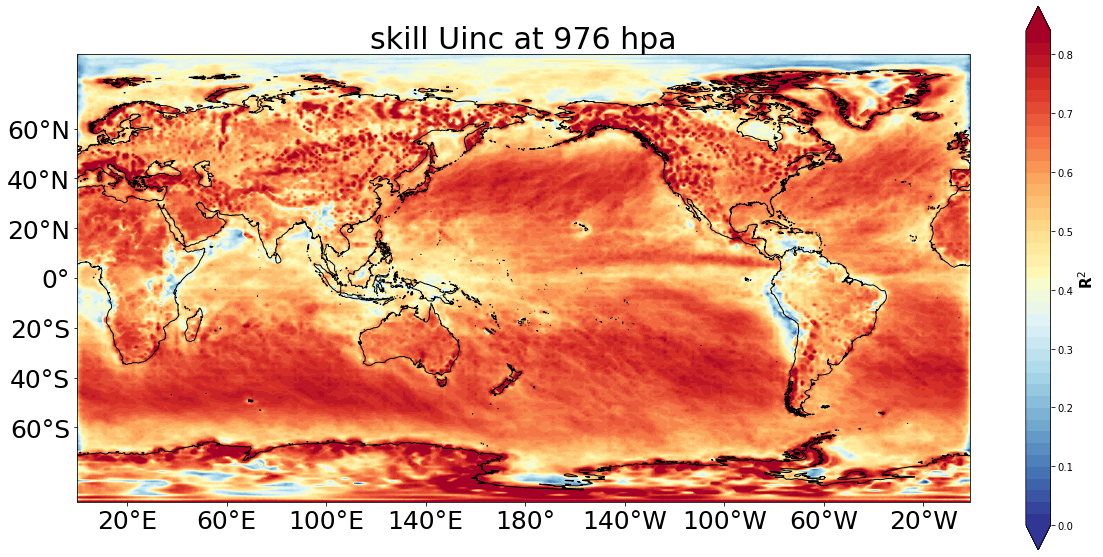

In [21]:
filly =Fns[-2][0] 
DS = xr.open_dataset(filly)
DS['r2_'].sel(var=0)
numnum=1
pfield = DS['r2_'].sel(var=numnum).squeeze()
lat = DS['lat']
lon = DS['lon']

fig = plt.figure(figsize=(20, 10))
proj = ccrs.PlateCarree(central_longitude=180)
ax1 = plt.subplot(1, 1, 1, projection=proj)
ax1.coastlines('50m')
plt.contourf(lon -180, lat,  pfield,levels=clevs, cmap=cmapzzz,transform=proj,extend='both')
states_provinces = cfeature.NaturalEarthFeature(
            category='cultural',
            name='admin_1_states_provinces_lines',
            scale='10m',
            facecolor='none')
ax1.set_xticks([20,60,100,140,180,220,260,300,340], crs=ccrs.PlateCarree())
ax1.set_yticks(np.arange(-60,70,20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True,number_format='.0f')
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)
ax1.tick_params(labelsize=25) 
# ax1.set_extent([0,359,-30,75], crs=ccrs.PlateCarree())
plt.title(f'skill Uinc at {filly.split("level_")[-1].split(".")[0]} hpa',fontsize=30)
plt.colorbar().set_label(label='R$^{2}$',size=15,weight='bold')
plt.show()